#CONVERTING CODECHEF RATINGS INTO CODEFORCES

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url='https://drive.google.com/file/d/1VfCaU5vFVWsSYrvKQF2x9iS6I7KoWEVH/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
print(df)

       ss_username     cf_username  cf_rating     cc_username  cc_rating
0         eldnahon           slime     3449.0  peehs_moorhsum     3007.0
1             jora             NaN        NaN             uwi     2906.0
2             lala             NaN        NaN          kal013     2756.0
3          wesnerm             NaN        NaN          wmoise     2696.0
4       grebnesieh      grebnesieh     1703.0      grebnesieh     2673.0
...            ...             ...        ...             ...        ...
11270       TeaPot          teapot     2677.0             NaN        NaN
11271    luosiyuan          tianbu     2882.0             NaN        NaN
11272    dorijanko  dorijanlendvaj     3120.0             NaN        NaN
11273     gamegame        gamegame     3218.0             NaN        NaN
11274  0xrayhansec         tourist     3764.0             NaN        NaN

[11275 rows x 5 columns]


In [14]:
df.columns

Index(['ss_username', 'cf_username', 'cf_rating', 'cc_username', 'cc_rating'], dtype='object')

In [15]:
#Displayingg intial values of x and y before nan dropping
x=df['cc_rating']
y=df['cf_rating']
print('Initial count of cc:',len(x),'cf:',len(y))

#Dropping nan values from x and y
x=x.dropna()
y=y.dropna()

#Display counts after dropping nan values
print('Counts after dropping nan values cc:',len(x),'cf:',len(y))

Initial count of cc: 11275 cf: 11275
Counts after dropping nan values cc: 10280 cf: 7437


Number of cc entries not entries not equal to the number of cf entries...therefore we only thake the entry of users who have both entries and drop the rest of the entries

In [16]:
#Dropping the rows with nan values
df_1=df.dropna()
#Shape of the dataframe after dropping nan values
print("Shape of the dataframe after dropping nan values:",df_1.shape)
#Values of x and y after dropping values
x=df_1['cc_rating']
y=df_1['cf_rating']

Shape of the dataframe after dropping nan values: (6442, 5)


SCATTER PLOT BETWEEN x AND y

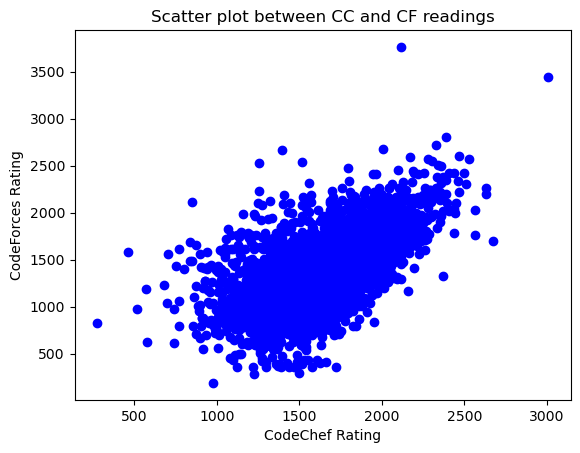

In [17]:
plt.scatter(x,y,color='blue')
plt.title('Scatter plot between CC and CF readings')
plt.xlabel('CodeChef Rating')
plt.ylabel('CodeForces Rating')
plt.show()

MAKING A REGRESSION PLOT BETWEEN CC AND CF RATING

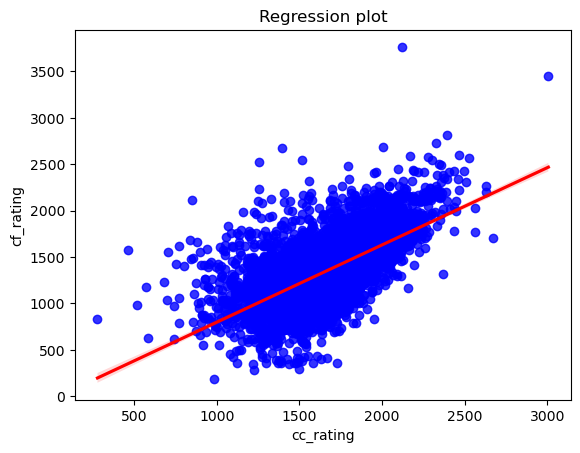

In [19]:
#Makin a regression plot using Seaborn
sns.regplot(x=x,y=y,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Regression plot')
plt.show()

FINDING THE VALUES OF ESTIMATED COEFFICIENTS

Estimated coefficients:
Intercept (b_0): -32.62926507315615
Slope (b_1): 0.8315620555789324


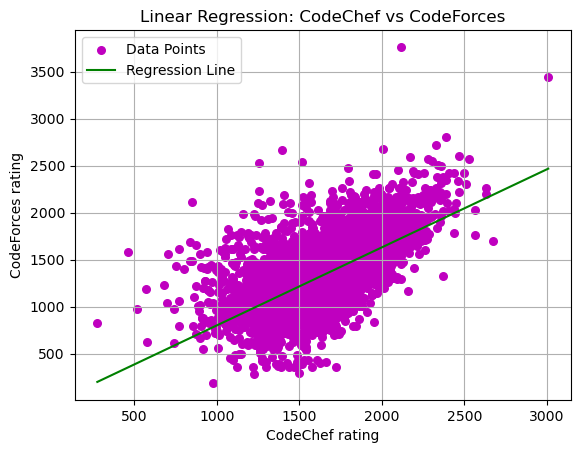

In [20]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
    
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "m", marker = "o", s = 30, label='Data Points')
  
    # Plotting Regression line with predicted response vector
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "g", label='Regression Line')
    
    # Adding labels and legend
    plt.xlabel('CodeChef rating')
    plt.ylabel('CodeForces rating')
    plt.title('Linear Regression: CodeChef vs CodeForces')
    plt.legend()
    plt.grid(True)
    plt.show()
  
# Estimated coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:")
print("Intercept (b_0):", b[0])
print("Slope (b_1):", b[1])

# Plotting regression line
plot_regression_line(x, y, b)

PREDICTING THE RATINGS

In [22]:
b_0= -32.62926507315615
b_1= 0.8315620555789324
def fun(codechef_rating):
    codeforces_rating = (codechef_rating * b_1) + b_0
    return codeforces_rating

# Iterate over a range of CodeChef ratings
for z in range(700, 2100, 50):
    codechef_rating = z
    codeforces_rating = fun(codechef_rating)
    print("Codechef:", codechef_rating, "Codeforces:", round(codeforces_rating, 2))

Codechef: 700 Codeforces: 549.46
Codechef: 750 Codeforces: 591.04
Codechef: 800 Codeforces: 632.62
Codechef: 850 Codeforces: 674.2
Codechef: 900 Codeforces: 715.78
Codechef: 950 Codeforces: 757.35
Codechef: 1000 Codeforces: 798.93
Codechef: 1050 Codeforces: 840.51
Codechef: 1100 Codeforces: 882.09
Codechef: 1150 Codeforces: 923.67
Codechef: 1200 Codeforces: 965.25
Codechef: 1250 Codeforces: 1006.82
Codechef: 1300 Codeforces: 1048.4
Codechef: 1350 Codeforces: 1089.98
Codechef: 1400 Codeforces: 1131.56
Codechef: 1450 Codeforces: 1173.14
Codechef: 1500 Codeforces: 1214.71
Codechef: 1550 Codeforces: 1256.29
Codechef: 1600 Codeforces: 1297.87
Codechef: 1650 Codeforces: 1339.45
Codechef: 1700 Codeforces: 1381.03
Codechef: 1750 Codeforces: 1422.6
Codechef: 1800 Codeforces: 1464.18
Codechef: 1850 Codeforces: 1505.76
Codechef: 1900 Codeforces: 1547.34
Codechef: 1950 Codeforces: 1588.92
Codechef: 2000 Codeforces: 1630.49
Codechef: 2050 Codeforces: 1672.07
